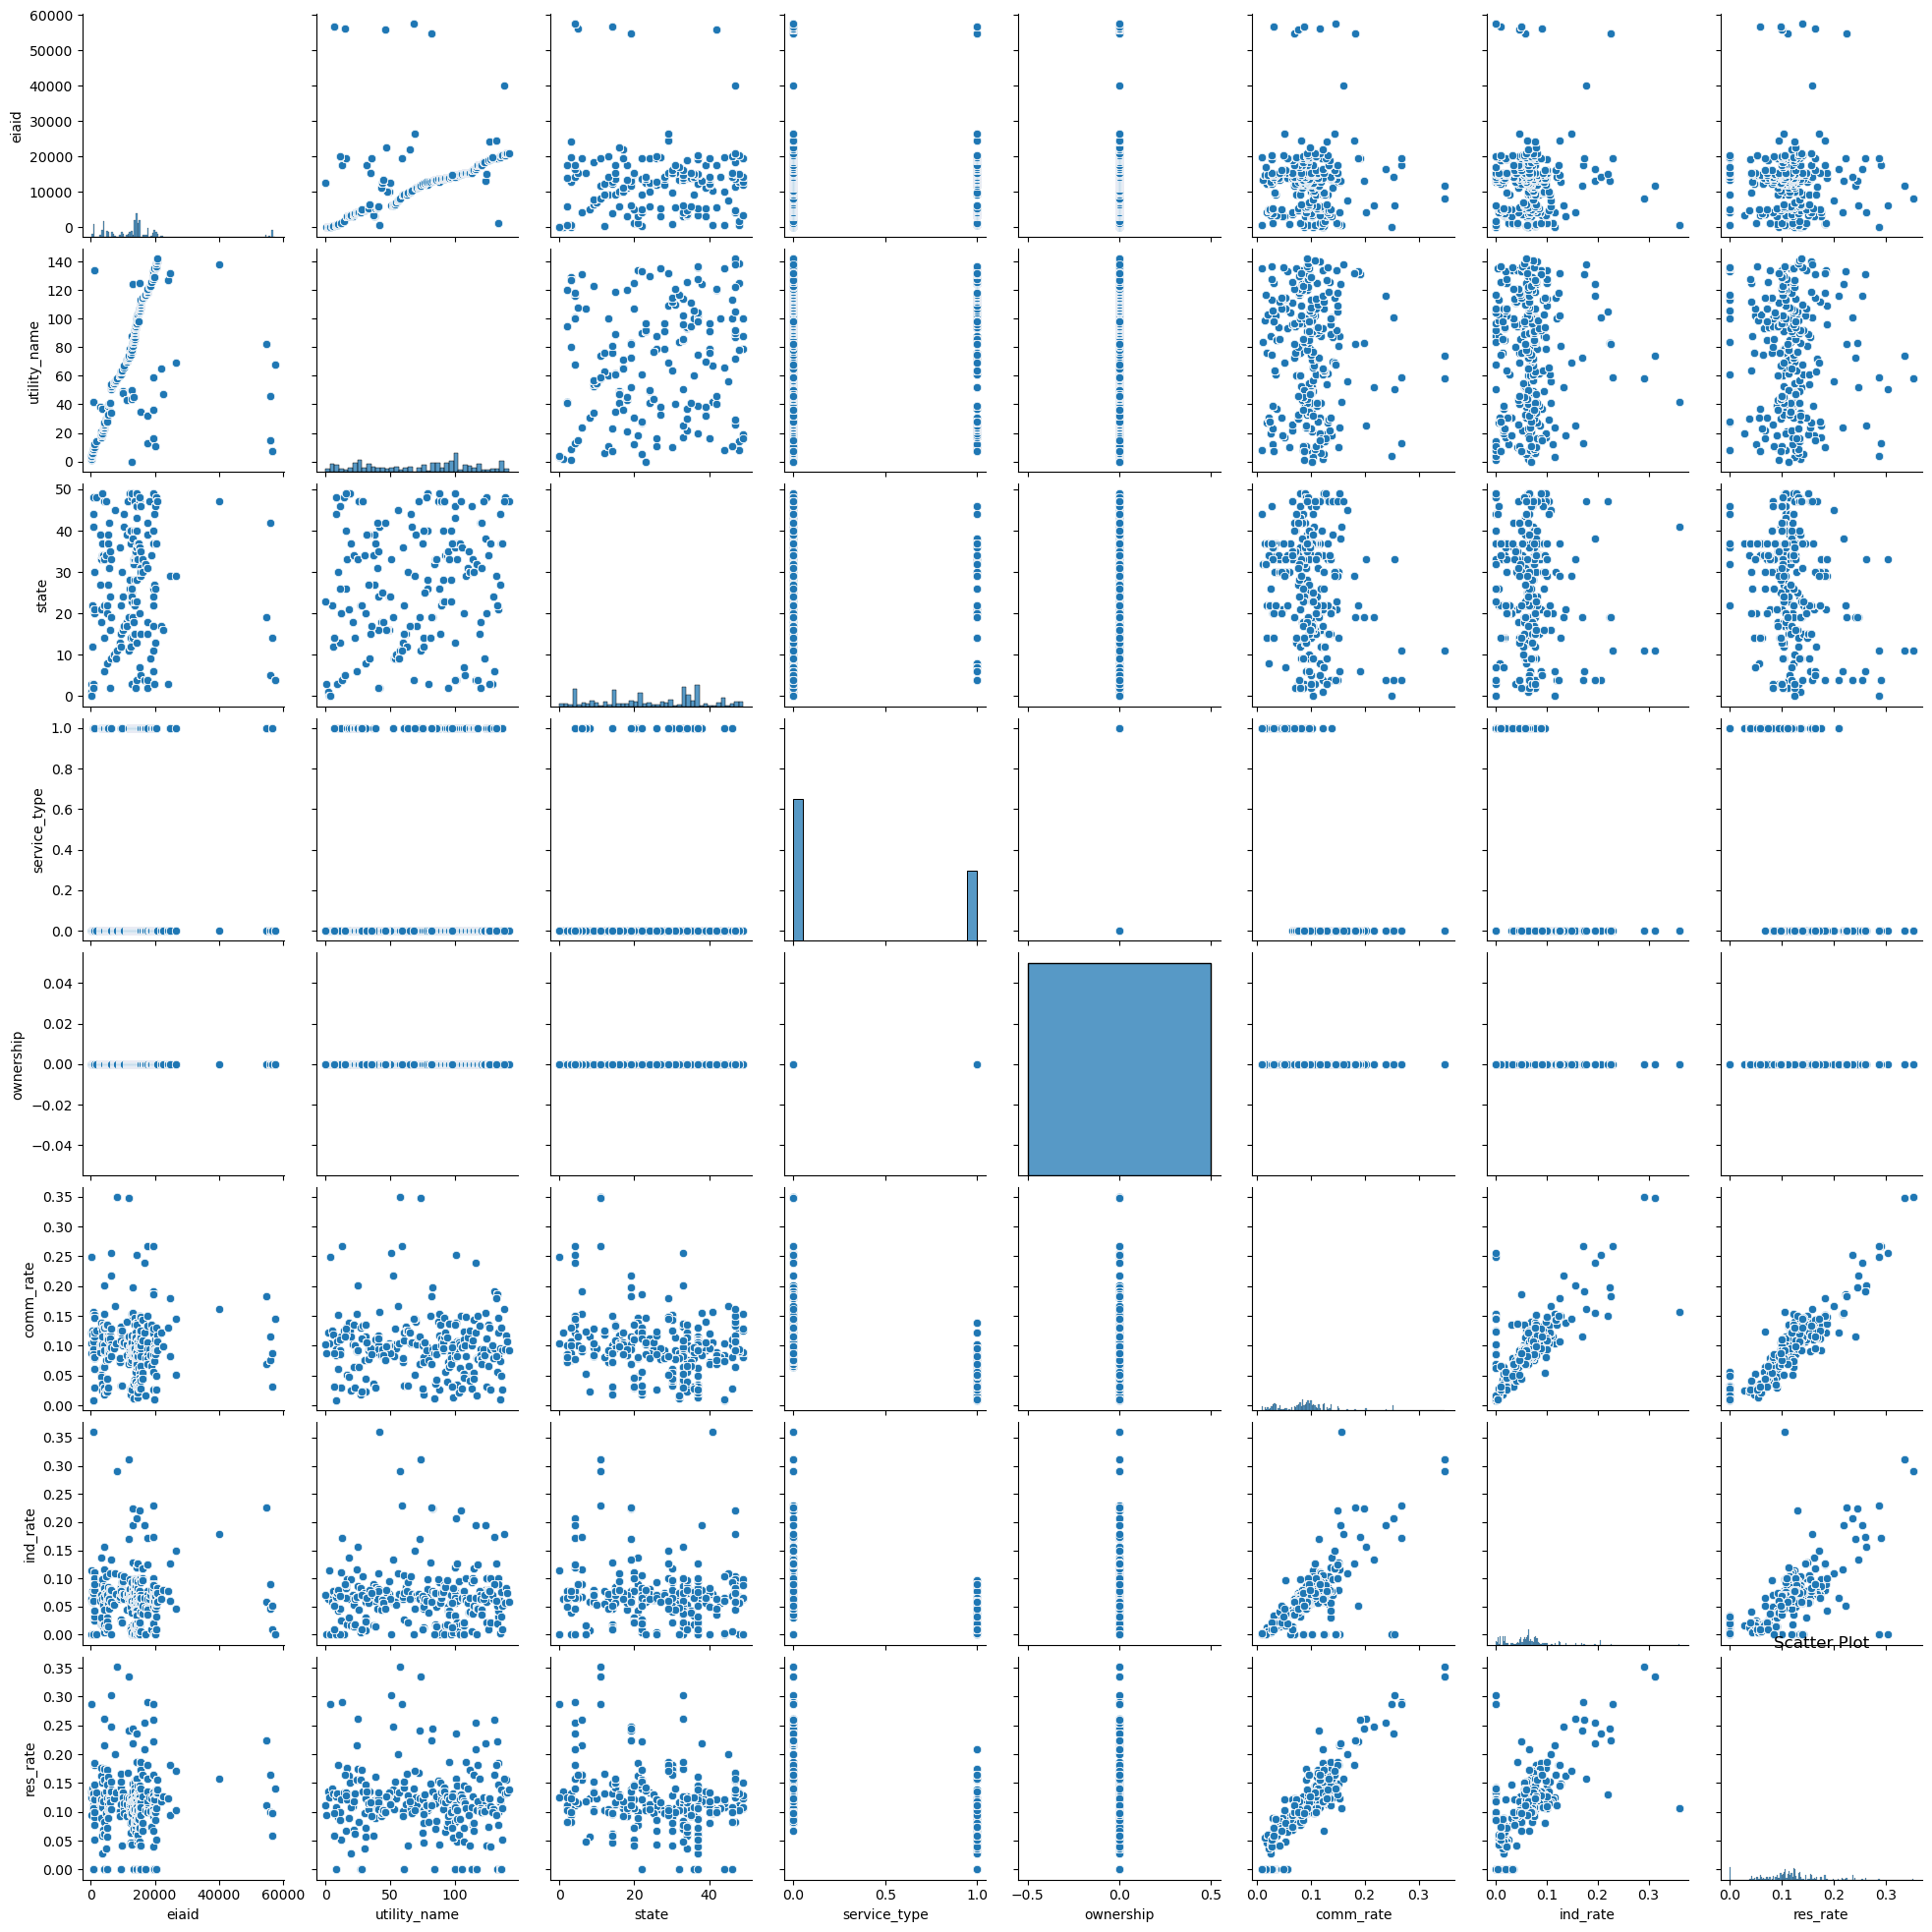

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52177 entries, 0 to 52176
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eiaid         52177 non-null  int64  
 1   utility_name  52177 non-null  int32  
 2   state         52177 non-null  int32  
 3   service_type  52177 non-null  int32  
 4   ownership     52177 non-null  int32  
 5   comm_rate     52177 non-null  float64
 6   ind_rate      52177 non-null  float64
 7   res_rate      52177 non-null  float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 2.4 MB


C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

           0       0.63      0.88      0.74      3295
           1       0.93      0.77      0.84      7141

    accuracy                           0.80     10436
   macro avg       0.78      0.82      0.79     10436
weighted avg       0.84      0.80      0.81     10436



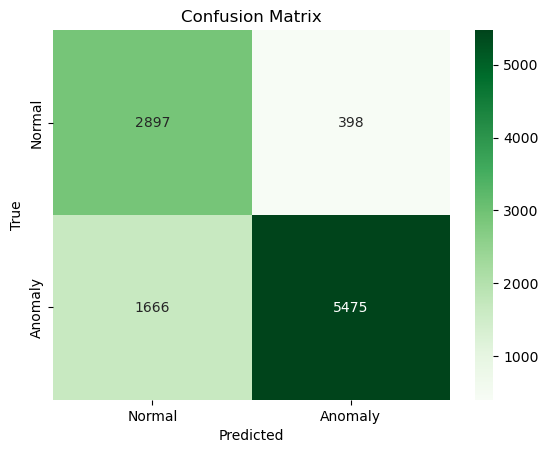

Precision: 0.80
Recall: 0.80
F1 Score: 0.80


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

def anomaly_detection_svm():
    
    # Load dataset
    data = pd.read_csv('US_Util_2020.csv')
    
    #convert all the values in the columns into numeric
    label_encoder = LabelEncoder()
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = label_encoder.fit_transform(data[column])
    
#     text_columns = data[['service_type','ownership','state']]
   

#     # Assuming 'text_columns' is a list of columns containing text values
#     label_encoder = LabelEncoder()
#     for col in text_columns:
#         data[col + '_encoded'] = label_encoder.fit_transform(data[col])
        
#     label_encoder = LabelEncoder()
#     data['state_encoded'] = label_encoder.fit_transform(data['state'])
#     data['service_type_encoded'] = label_encoder.fit_transform(data['service_type'])
#     data['ownership_encoded'] = label_encoder.fit_transform(data['ownership'])
    
    
    data = data.drop(['zip'], axis=1)
    
    
    sns.pairplot(data, kind='scatter')
    plt.title('Scatter Plot')
    plt.show()
    
    data.info()
    X = data.drop('res_rate', axis=1)  # Assuming 'target' is the column name of the continuous target variable
    y_cont = data['res_rate']
    
    data = data.dropna(axis=0, inplace=True)
#     #convert all the values in the columns into numeric
#     for column in data.columns:
#         data[column] = pd.to_numeric(data[column], errors='coerce')

    y = np.where(y_cont > 0.1, 1, 0)  # Define `threshold` based on your domain knowledge
    
    selector = SelectKBest(f_classif, k=5)
    X_selected = selector.fit_transform(X, y)
    
    X_selected

    
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=5)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train One-Class SVM
    clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
    clf.fit(X_train_scaled[y_train == 0])  # Assuming 0 is the label for normal data
    
    # Predict
    y_pred = clf.predict(X_test_scaled)
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions: -1 to 1 for anomalies, 1 to 0 for normal
    
    # Evaluate
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    

    
    # Evaluate the SVM model
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
     # Print the evaluation metrics
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))

# Example usage
anomaly_detection_svm()
